In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.3 MB/s eta 0:00:00
   ━━

In [2]:
import pycaret

In [3]:
from pycaret.utils import version
version()

'3.3.2'

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [5]:
data = pd.read_csv('WineQT.csv')

# **PREPROCESSING THE DATASET**

In [6]:
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,3.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,4.0


# **USING CLUSTERING**

In [7]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(data)

,Description,Value
0,Session id,4237
1,Original data shape,"(1143, 13)"
2,Transformed data shape,"(1143, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


# **K-MEANS CLUSTERING**

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5699,4344.5588,0.5262,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5483,5349.6062,0.5369,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5277,6161.9645,0.5533,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

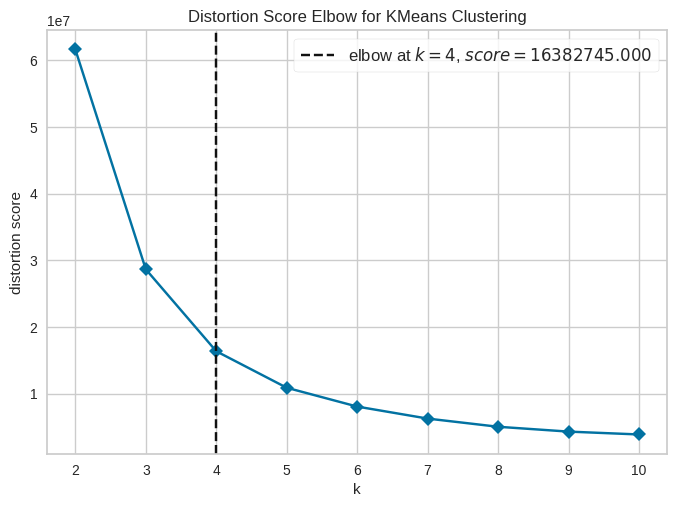

In [8]:
setup(data, verbose=False)
r1 = []
r2 = []
r3 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r1.append(silhouette_score(data,labels))
r1.append(calinski_harabasz_score(data,labels))
r1.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r2.append(silhouette_score(data,labels))
r2.append(calinski_harabasz_score(data,labels))
r2.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r3.append(silhouette_score(data,labels))
r3.append(calinski_harabasz_score(data,labels))
r3.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1552,188.3879,1.9746,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1501,183.1135,1.8025,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1437,166.3520,1.7990,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

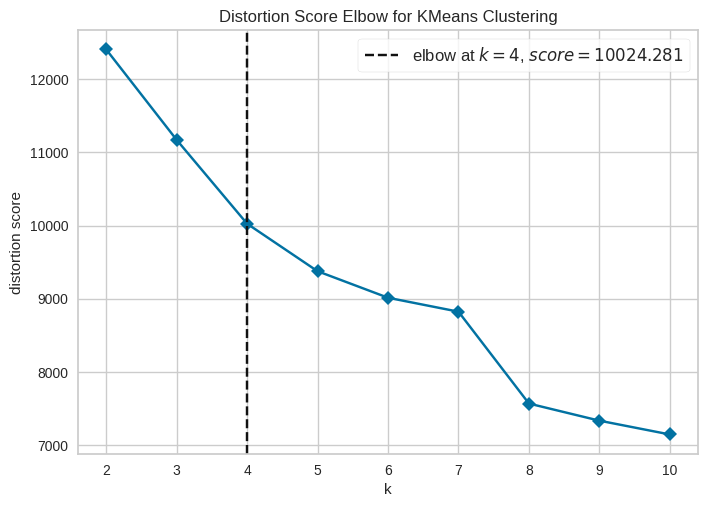

In [9]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r4 = []
r5 = []
r6 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r4.append(silhouette_score(data,labels))
r4.append(calinski_harabasz_score(data,labels))
r4.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r5.append(silhouette_score(data,labels))
r5.append(calinski_harabasz_score(data,labels))
r5.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r6.append(silhouette_score(data,labels))
r6.append(calinski_harabasz_score(data,labels))
r6.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Transformation

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5889,4283.1423,0.5051,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5602,5181.6465,0.5120,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5543,6277.1704,0.5143,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

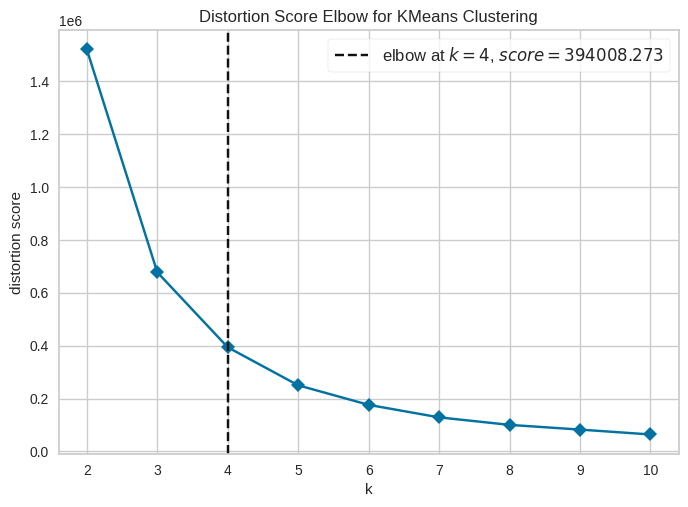

In [10]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r7 = []
r8 = []
r9 = []

print("Transformation\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r7.append(silhouette_score(data,labels))
r7.append(calinski_harabasz_score(data,labels))
r7.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r8.append(silhouette_score(data,labels))
r8.append(calinski_harabasz_score(data,labels))
r8.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r9.append(silhouette_score(data,labels))
r9.append(calinski_harabasz_score(data,labels))
r9.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')


PCA

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5699,4344.2260,0.5261,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5483,5349.6078,0.5369,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5277,6161.9647,0.5533,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

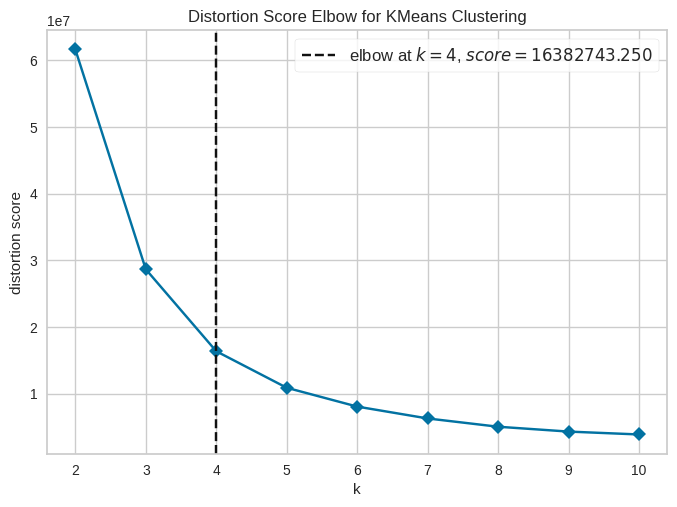

In [11]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r10 = []
r11 = []
r12 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r10.append(silhouette_score(data,labels))
r10.append(calinski_harabasz_score(data,labels))
r10.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r11.append(silhouette_score(data,labels))
r11.append(calinski_harabasz_score(data,labels))
r11.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r12.append(silhouette_score(data,labels))
r12.append(calinski_harabasz_score(data,labels))
r12.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')